---
title: Aggregate climate data to DHIS2 organisation units
short_title: Org unit aggregation
---

In this notebook we will show how to load daily climate data from NetCDF and use [earthkit](https://ecmwf.github.io/earthkit-website/) to aggregate temperature and precipitation climate variables to DHIS2 organisation units.

In [33]:
import geopandas as gpd
import xarray as xr
from earthkit import transforms

## Loading the data

Our sample NetCDF file contains [ERA5-Land monthly](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=overview) temperature and precipitation data for Sierra Leone between 1990 and 2025. Let's load the file using [xarray](https://xarray.dev) and drop some variables that we don't need:

In [34]:
file = "../data/era5-land-monthly-temp-precip-1990-2025-sierra-leone.nc"
data = xr.open_dataset(file)
data = data.drop_vars(['number', 'expver'])

If we inspect the xarray dataset, we see that the file includes 2 spatial dimensions (`latitude`, `longitude`), a temporal dimension containing 428 months (`valid_time`) and two data variables `t2m` (temperature at 2m above sea level), and `tp` (total precipitation). The data source is [European Centre for Medium-Range Weather Forecasts (ECMWF)](https://www.ecmwf.int). 

In [35]:
data

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 428, latitude: 33, longitude: 33)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 1990-01-01 ... 2025-08-01
  * latitude    (latitude) float64 264B 10.1 10.0 9.9 9.8 ... 7.2 7.1 7.0 6.9
  * longitude   (longitude) float64 264B -13.4 -13.3 -13.2 ... -10.4 -10.3 -10.2
Data variables:
    t2m         (valid_time, latitude, longitude) float32 2MB ...
    tp          (valid_time, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T21:53 GRIB to CDM+CF via cfgrib-0.9.1...

## Loading the organisation units

Next, we use GeoPandas to load our organisation units that we've [downloaded from DHIS2 as a GeoJSON file](../org-units/download-manual.md): 

In [36]:
district_file = "../data/sierra-leone-districts.geojson"
org_units = gpd.read_file(district_file)

The GeoJSON file contains the boundaries of 13 named organisation units in Sierra Leone. For the aggregation, we are particularly interested in the `id` and the `geometry` (polygon) of the org unit:

In [37]:
org_units

,type,id,name,hasCoordinatesDown,hasCoordinatesUp,level,grandParentParentGraph,grandParentId,parentGraph,parentId,parentName,dimensions,weight,geometry
0,Polygon,O6uvpzGd5pu,Bo,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Polygon,fdc6uOvgoji,Bombali,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,MultiPolygon,lc3eMKXaEfw,Bonthe,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Polygon,jUb8gELQApl,Kailahun,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,MultiPolygon,PMa2VCrupOd,Kambia,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,Polygon,kJq2mPyFEHo,Kenema,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,Polygon,qhqAxPSTUXp,Koinadugu,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Polygon,Vth0fbpFcsO,Kono,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,MultiPolygon,jmIPBj66vD6,Moyamba,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,MultiPolygon,TEQlaapDQoK,Port Loko,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


## Aggregating the data to organisation units

To aggregate the data to the org unit features we use the `spatial.reduce` function of [earthkit-transforms](https://earthkit-transforms.readthedocs.io). We keep the daily period type and only aggregate the data spatially to the org unit features. 

Since our climate data variables need to be aggregated using different statistics, we do separate aggregations for each variable. 

### Temperature

First, let's see what the temperature data looks like that we are trying to aggregate. We select July 2025 and plot it on a map:

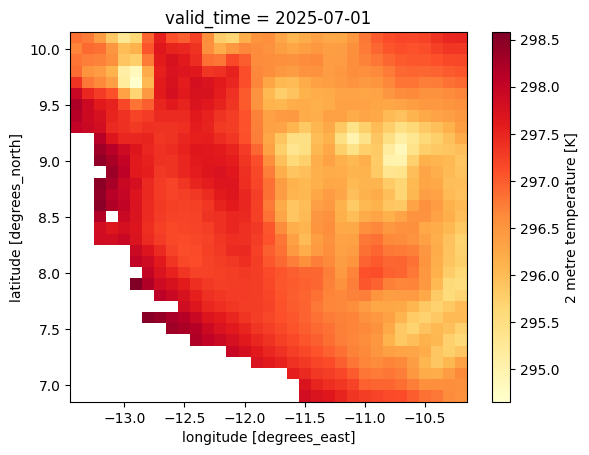

In [38]:
data.sel(valid_time='2025-07')['t2m'].plot(cmap='YlOrRd')

To aggregate the temperature variable, we extract the temperature or `t2m` variable, and tell the `spatial.reduce` function to aggregate the data to our organisation units `org_units`. We set `mask_dim='id'` to specify that we want one aggregated value for every unique value in the organisation unit `id` column. Finally, we set `how='mean'` so that we get the average temperature of all gridded values that land inside an organisation unit. 

In [39]:
temp = data['t2m']
agg_temp = transforms.spatial.reduce(temp, org_units, mask_dim='id', how='mean')
agg_temp.sizes

Frozen({'id': 13, 'valid_time': 428})

The result from `spatial.reduce` is an `xarray` object and contains data for 13 organisation units along the `id` dimensions, and 428 months along the `valid_time` dimension. To more easily read the aggregated values, we convert it to a Pandas DataFrame:

In [40]:
agg_temp_df = agg_temp.to_dataframe().reset_index()
agg_temp_df

,id,valid_time,t2m
0,O6uvpzGd5pu,1990-01-01,299.332855
1,O6uvpzGd5pu,1990-02-01,300.702026
2,O6uvpzGd5pu,1990-03-01,301.218048
3,O6uvpzGd5pu,1990-04-01,300.047180
4,O6uvpzGd5pu,1990-05-01,298.360992
...,...,...,...
5559,at6UHUQatSo,2025-04-01,300.587769
5560,at6UHUQatSo,2025-05-01,300.013184
5561,at6UHUQatSo,2025-06-01,299.042603
5562,at6UHUQatSo,2025-07-01,297.823547


We see that the aggregated dataframe contains what seems to be kelvin temperature values for each organisation unit and each time period (monthly).

Finally, let's plot what this looks like on a map. We can merge our Pandas DataFrame with the `org_units` GeoPandas DataFrame to plot the aggregated temperature values on a map. We again select July 2025 to compare with the previous map of gridded temperature values for the same date.

<Axes: >

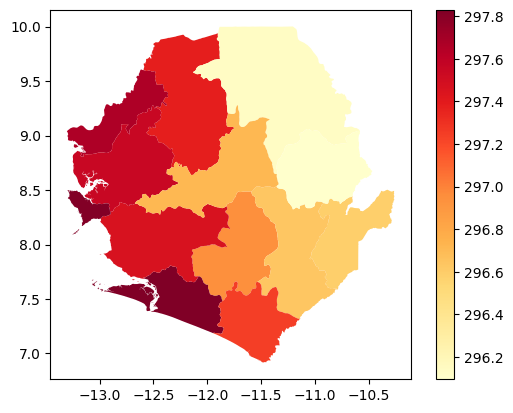

In [41]:
agg_temp_snapshot = agg_temp_df[agg_temp_df['valid_time']=='2025-07']
org_units_with_temp = org_units.merge(agg_temp_snapshot, on='id', how='left')
org_units_with_temp.plot(column="t2m", cmap="YlOrRd", legend=True)

### Precipitation

**Important**: The [monthly version of ERA5-Land](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means) reports all variables as daily averages. In order to get **total precipitation** for the entire month, we should first multiply the average daily precipitation (`tp`) with the number of days per month (xarray date fields provide this as an attribute `.dt.days_in_month`): 

In [42]:
data['tp'] = data['tp'] * data.valid_time.dt.days_in_month

Let's see what the total precipitation data for July 2025 looks like on a map:

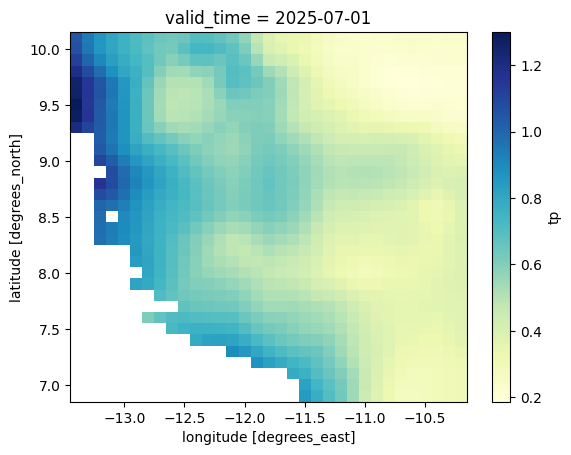

In [43]:
data.sel(valid_time='2025-07')['tp'].plot(cmap='YlGnBu')

We then use the same aggregation approach by selecting and passing the `tp` variable to the `transforms.spatial.reduce` function. We set `how='mean'` to get the average precipitation for the entire area. It's also common to report minimum and maximum precipitation, which can be done by instead setting `how='min'` or `how='max'`. 

In [44]:
precip = data['tp']
agg_precip = transforms.spatial.reduce(precip, org_units, mask_dim='id', how='mean')
agg_precip_df = agg_precip.to_dataframe().reset_index()
agg_precip_df

,id,valid_time,tp
0,O6uvpzGd5pu,1990-01-01,0.013571
1,O6uvpzGd5pu,1990-02-01,0.006148
2,O6uvpzGd5pu,1990-03-01,0.039529
3,O6uvpzGd5pu,1990-04-01,0.125680
4,O6uvpzGd5pu,1990-05-01,0.372811
...,...,...,...
5559,at6UHUQatSo,2025-04-01,0.035174
5560,at6UHUQatSo,2025-05-01,0.215226
5561,at6UHUQatSo,2025-06-01,0.414642
5562,at6UHUQatSo,2025-07-01,0.933525


We see that the aggregated dataframe contains what seems to be total precipitation values in meters for each organisation unit and each time period (monthly). 

Again, we can convert our xarray to a merged GeoPandas DataFrame to map aggregated precipitation values for July 2025:

<Axes: >

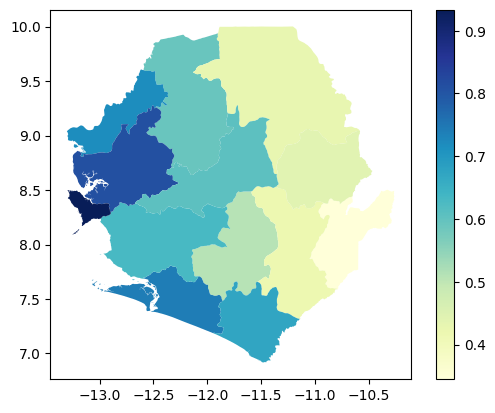

In [45]:
agg_precip_snapshot = agg_precip_df[agg_precip_df['valid_time']=='2025-07']
org_units_with_precip = org_units.merge(agg_precip_snapshot, on='id', how='left')
org_units_with_precip.plot(column="tp", cmap="YlGnBu", legend=True)

## Post-processing

We have now aggregated the temperature and precipitation data to our organisation units. But before we submit the results to DHIS2, we want to make sure they are reported in a format that makes sense to most users. 

For temperature, we convert the data values from kelvin to Celcius by subtracting `273.15` from the values:

In [46]:
agg_temp_df['t2m'] -= 273.15
agg_temp_df

,id,valid_time,t2m
0,O6uvpzGd5pu,1990-01-01,26.182861
1,O6uvpzGd5pu,1990-02-01,27.552032
2,O6uvpzGd5pu,1990-03-01,28.068054
3,O6uvpzGd5pu,1990-04-01,26.897186
4,O6uvpzGd5pu,1990-05-01,25.210999
...,...,...,...
5559,at6UHUQatSo,2025-04-01,27.437775
5560,at6UHUQatSo,2025-05-01,26.863190
5561,at6UHUQatSo,2025-06-01,25.892609
5562,at6UHUQatSo,2025-07-01,24.673553


For precipitation, to avoid small decimal numbers, we convert the reporting unit from meters to millimeters:

In [47]:
agg_precip_df['tp'] *= 1000
agg_precip_df

,id,valid_time,tp
0,O6uvpzGd5pu,1990-01-01,13.571045
1,O6uvpzGd5pu,1990-02-01,6.147548
2,O6uvpzGd5pu,1990-03-01,39.529034
3,O6uvpzGd5pu,1990-04-01,125.680494
4,O6uvpzGd5pu,1990-05-01,372.811335
...,...,...,...
5559,at6UHUQatSo,2025-04-01,35.174482
5560,at6UHUQatSo,2025-05-01,215.226028
5561,at6UHUQatSo,2025-06-01,414.641630
5562,at6UHUQatSo,2025-07-01,933.524897


## Next steps

In this notebook, we have successfully aggregated temperature and precipitation data into Pandas DataFrames and converted the values to more easily interpreted units such as degrees Celsius and millimeters. To learn how to import these aggregated DataFrames into DHIS2, see [our guide for importing data values using the Python DHIS2 client](../import-data/intro). 